<a href="https://colab.research.google.com/github/yussouf88/Deep_learning/blob/main/my_new_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as f
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
pd.set_option('future.no_silent_downcasting', True)

In [4]:
class Model(nn.Module):
  def __init__(self,ip=4,h1=8,h2=9,h3=8,op=3):
    super().__init__()
    self.fc1 = nn.Linear(ip,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.fc3 = nn.Linear(h2,h3)
    self.fc4 = nn.Linear(h3,op)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = f.relu(self.fc3(x))
    x = self.fc4(x)
    return x

torch.manual_seed(21)
model = Model()


In [5]:
#Data Import
ur1 = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(ur1)
df['variety'] = df.species.replace(['setosa', 'versicolor', 'virginica'],[0,1,2])
x = df[['sepal_length',	'sepal_width',	'petal_length',	'petal_width']].values
y = pd.to_numeric(df['variety'].values)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 21)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [6]:
cri = nn.CrossEntropyLoss()
opt = torch.optim.Adam(model.parameters(),lr = .01)
lss = []
ep = 100
for i in range(ep):
  y_pred = model.forward(x_train)
  loss = cri(y_pred,y_train)
  lss.append(loss.detach().numpy())
  if i%10 == 0:
    print(f'for i= {i} loss = {loss}')

  opt.zero_grad()
  loss.backward()
  opt.step()


for i= 0 loss = 1.1089309453964233
for i= 10 loss = 0.9425957798957825
for i= 20 loss = 0.6103331446647644
for i= 30 loss = 0.348080575466156
for i= 40 loss = 0.18991470336914062
for i= 50 loss = 0.08531496673822403
for i= 60 loss = 0.050153836607933044
for i= 70 loss = 0.03817233815789223
for i= 80 loss = 0.03194485604763031
for i= 90 loss = 0.028278304263949394


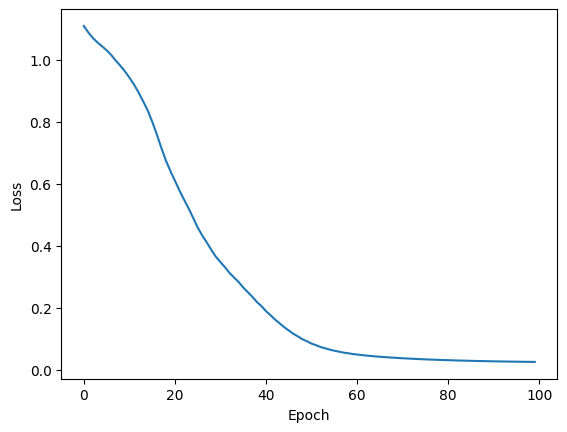

In [7]:
plt.plot(range(ep),lss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [8]:
with torch.no_grad():
  y_pred = model.forward(x_test)
  loss = cri(y_pred,y_test)
  print(loss)

tensor(0.1497)


In [9]:
with torch.no_grad():
  for i,dat in enumerate(x_test):
    y_pred1 = model.forward(dat)
    if y_pred1.argmax() != y_test[i]:
      print(f'{i+1} \t {y_test[i]} \t {y_pred1.argmax()} \t {y_test[i]-y_pred1.argmax()}')

23 	 1 	 2 	 -1


In [12]:
torch.save(model.state_dict(),'my_model.pt')

In [15]:
model1 = Model()
model1.load_state_dict(torch.load('my_model.pt'))
model.eval()


Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (fc3): Linear(in_features=9, out_features=8, bias=True)
  (fc4): Linear(in_features=8, out_features=3, bias=True)
)

In [91]:
#using the model
dat1 = torch.tensor([6.7,	3.0,	5.2,	2.3])
with torch.no_grad():
  print(model1(dat1).argmax())


tensor(2)
